In [9]:
import dask.dataframe as bd
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import jieba
from sklearn.model_selection import train_test_split

In [2]:
origin_data = bd.read_csv(os.path.join(os.getcwd(), 'final_data.csv'))
origin_data = origin_data.compute()

In [14]:
origin_data.head()

,Unnamed: 0,mean_price,capacity,time,price,area,region,room_type,house_level,position,type,mean_price_level,price_level,title,labels
0,0,24626,80,2014,199,4,128,"('2', '2')",32,512.0,192.0,3,3,自住装修，坐拥加州风格大湖，楼层视野佳，置换诚心出售，随时看,"['环境优美', '次新小区', '品质小区']"
1,1,24807,76,2013,190,4,109,"('2', '2')",18,436.0,108.0,3,3,复地上城 近地铁 满两年 总价醉低的两房 中间楼层 采光充足,"['近地铁', '配套成熟', '次新小区']"
2,2,42216,75,2006,320,1,121,"('2', '2')",33,121.0,198.0,4,4,出门近江地铁口，天地學区房，电梯2房朝南东边套，视野好采光好,"['近地铁', '近学校', '南北通透']"
3,3,58835,147,2008,870,10,124,"('4', '2')",33,1240.0,330.0,4,4,全景VR看房钱江新城金基晓庐跃层 4房2厅2卫 急降50万,"['近地铁', '南北通透']"
4,4,4600,50,2014,23,15,56,"('2', '2')",11,840.0,66.0,1,1,急售！急售！急售！房东破产，急需大量钱周转，一口价20万,"['近地铁', '配套成熟', '品质小区']"


In [10]:
x_train, x_test, y_train, y_test = train_test_split(origin_data[['title', 'labels']], origin_data['price_level'], random_state=1)

In [50]:
x_train.head()

,title,labels
1141,长睦锦苑，70方大两房，低总价，适合刚需，温馨小两房。诚心卖,"['主卧朝南', '客厅朝南', '南北通透']"
329,西湖之江 精装4.79米LOFT 钱塘江景房来电找我立减两万,"['新房房源', '环境优美', '交通便利']"
1233,下沙江滨地铁口 龙湖物业 人脸识别 房子精装花费60万,"['近地铁', '主卧朝南', '三房朝南']"
2873,欢乐城，可做两房，精装修，，朝南，南苑扣200米,"['近地铁', '环境优美', '品质小区']"
2183,满五无税 无社保可买 首付18万 价格可谈 上学方便低总价,"['厅带阳台', '配套成熟', '品质小区']"


### 两种方法验证词向量

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer='word', max_features=500)
features = cv.fit_transform(x_train['title'])
cv.get_feature_names()

['1号线地铁口',
 '3房2卫',
 '5米',
 '70年产权',
 '70年产权住宅',
 '70年产权住宅房',
 '70年产权可落户',
 '70年产权无抵押',
 '70年产权精装住宅',
 '70年产权送车位',
 '70年住宅',
 '70年大产权',
 '70年独立产权',
 '79米',
 '7号线地铁口',
 '8米',
 'loft',
 '一线江景',
 '一线江景房',
 '七十年产权',
 '三开间朝南',
 '三房',
 '三房两卫',
 '三证齐全',
 '三面采光',
 '不摇号',
 '不沿马路',
 '不用社保',
 '不要社保',
 '不限购',
 '不限购不限贷',
 '不限购住宅',
 '不限贷',
 '不靠高架',
 '业主包税',
 '业主急售',
 '业主置换',
 '业主诚售',
 '业主诚心出售',
 '业主降价急售',
 '东南海',
 '东海闲湖城',
 '东边套',
 '东郡国际',
 '两房朝南',
 '中上楼层',
 '中央空调加地暖',
 '中楼层',
 '中间套',
 '中间楼层',
 '中高楼层',
 '临安',
 '临安中天珺府',
 '临安城区',
 '临安青山湖',
 '临平北',
 '临平地铁口',
 '临近地铁口',
 '主卧朝南',
 '主城区',
 '九堡客运站地鉄口400米',
 '买到就是赚到',
 '买房送跨年演唱会门票',
 '买房送车位',
 '五证齐全',
 '五齐全',
 '交通便利',
 '交通方便',
 '产权70年',
 '产权清晰',
 '产权齐全',
 '产清晰',
 '产证五齐',
 '产证清晰',
 '产证齐',
 '产证齐全',
 '产过户',
 '产齐',
 '产齐全',
 '产齐全包租4000',
 '人民广场旁',
 '人车分流',
 '从未入住',
 '以租养贷',
 '价可谈',
 '价格可议',
 '价格可谈',
 '位置好',
 '低于市场价',
 '低于市场价20万',
 '低于市场价30万',
 '低于市场价出售',
 '低总价',
 '低首付',
 '便宜卖',
 '保真',
 '先到先得',
 '全新精装修',
 '全新装修',
 '全明户型',
 '全明西边套',
 '出售',
 '出国急售',
 '出行方便',
 '刚需三房

In [52]:
from sklearn.naive_bayes import MultinomialNB
classifer = MultinomialNB()
classifer.fit(features, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
classifer.score(cv.transform(x_test['title']), y_test)

0.435506241331484

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(analyzer='word', max_features=500)
features = tv.fit_transform(x_train['title'])

In [36]:
classifer.fit(features, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [55]:
classifer.score(tv.transform(x_test['title']), y_test)

0.43966712898751736

### label及title相互作用


In [56]:
def re_group_labels(wds):
    words = [label[1:-1].split(',') for label in wds['labels']]
    return [' '.join(ws) for ws in words]

In [45]:
tv = TfidfVectorizer(analyzer='word', max_features=500)
features = tv.fit_transform(re_group_labels(x_train))

In [41]:
from sklearn.naive_bayes import MultinomialNB
classifer = MultinomialNB()
classifer.fit(features, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [57]:
classifer.score(tv.transform(re_group_labels(x_test)), y_test)

0.31761442441054094

In [60]:
def join_words(title, label):
    wds = [title]
    wds.extend(label[1:-1].split(','))
    return wds

def re_group_words(wds):
    words = [join_words(title, label) for title, label in zip(wds['title'], wds['labels'])]
    return [' '.join(ws) for ws in words]

In [61]:
tv = TfidfVectorizer(analyzer='word', max_features=500)
features = tv.fit_transform(re_group_words(x_train))

In [62]:
from sklearn.naive_bayes import MultinomialNB
classifer = MultinomialNB()
classifer.fit(features, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [63]:
classifer.score(tv.transform(re_group_words(x_test)), y_test)

0.4604715672676838

### 相似度特征


In [67]:
from sklearn.metrics.pairwise import cosine_similarity
features = tv.fit_transform(re_group_words(origin_data[['title', 'labels']]))
sim_matrix = cosine_similarity(features.toarray())
sim_matrix

array([[1.        , 0.12892403, 0.        , ..., 0.04474441, 0.        ,
        0.        ],
       [0.12892403, 1.        , 0.11672262, ..., 0.        , 0.09384138,
        0.05155115],
       [0.        , 0.11672262, 1.        , ..., 0.        , 0.07180573,
        0.06484718],
       ...,
       [0.04474441, 0.        , 0.        , ..., 1.        , 0.        ,
        0.04544805],
       [0.        , 0.09384138, 0.07180573, ..., 0.        , 1.        ,
        0.03171337],
       [0.        , 0.05155115, 0.06484718, ..., 0.04544805, 0.03171337,
        1.        ]])

In [68]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit_transform(sim_matrix)
cluster_labels = km.labels_
origin_data['ClusterLabel'] = cluster_labels
origin_data.head()

,Unnamed: 0,mean_price,capacity,time,price,area,region,room_type,house_level,position,type,mean_price_level,price_level,title,labels,ClusterLabel
0,0,24626,80,2014,199,4,128,"('2', '2')",32,512.0,192.0,3,3,自住装修，坐拥加州风格大湖，楼层视野佳，置换诚心出售，随时看,"['环境优美', '次新小区', '品质小区']",0
1,1,24807,76,2013,190,4,109,"('2', '2')",18,436.0,108.0,3,3,复地上城 近地铁 满两年 总价醉低的两房 中间楼层 采光充足,"['近地铁', '配套成熟', '次新小区']",0
2,2,42216,75,2006,320,1,121,"('2', '2')",33,121.0,198.0,4,4,出门近江地铁口，天地學区房，电梯2房朝南东边套，视野好采光好,"['近地铁', '近学校', '南北通透']",1
3,3,58835,147,2008,870,10,124,"('4', '2')",33,1240.0,330.0,4,4,全景VR看房钱江新城金基晓庐跃层 4房2厅2卫 急降50万,"['近地铁', '南北通透']",1
4,4,4600,50,2014,23,15,56,"('2', '2')",11,840.0,66.0,1,1,急售！急售！急售！房东破产，急需大量钱周转，一口价20万,"['近地铁', '配套成熟', '品质小区']",0


In [104]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=2, max_iter=100, random_state=42)
dt_matrix = lda.fit_transform(features)
tt_matrix = lda.components_
vocab = tv.get_feature_names()
topics = []
for w in tt_matrix:
    topic =[(token, weight) for token, weight in zip(vocab, w)]
    topics.append(topic[:50])

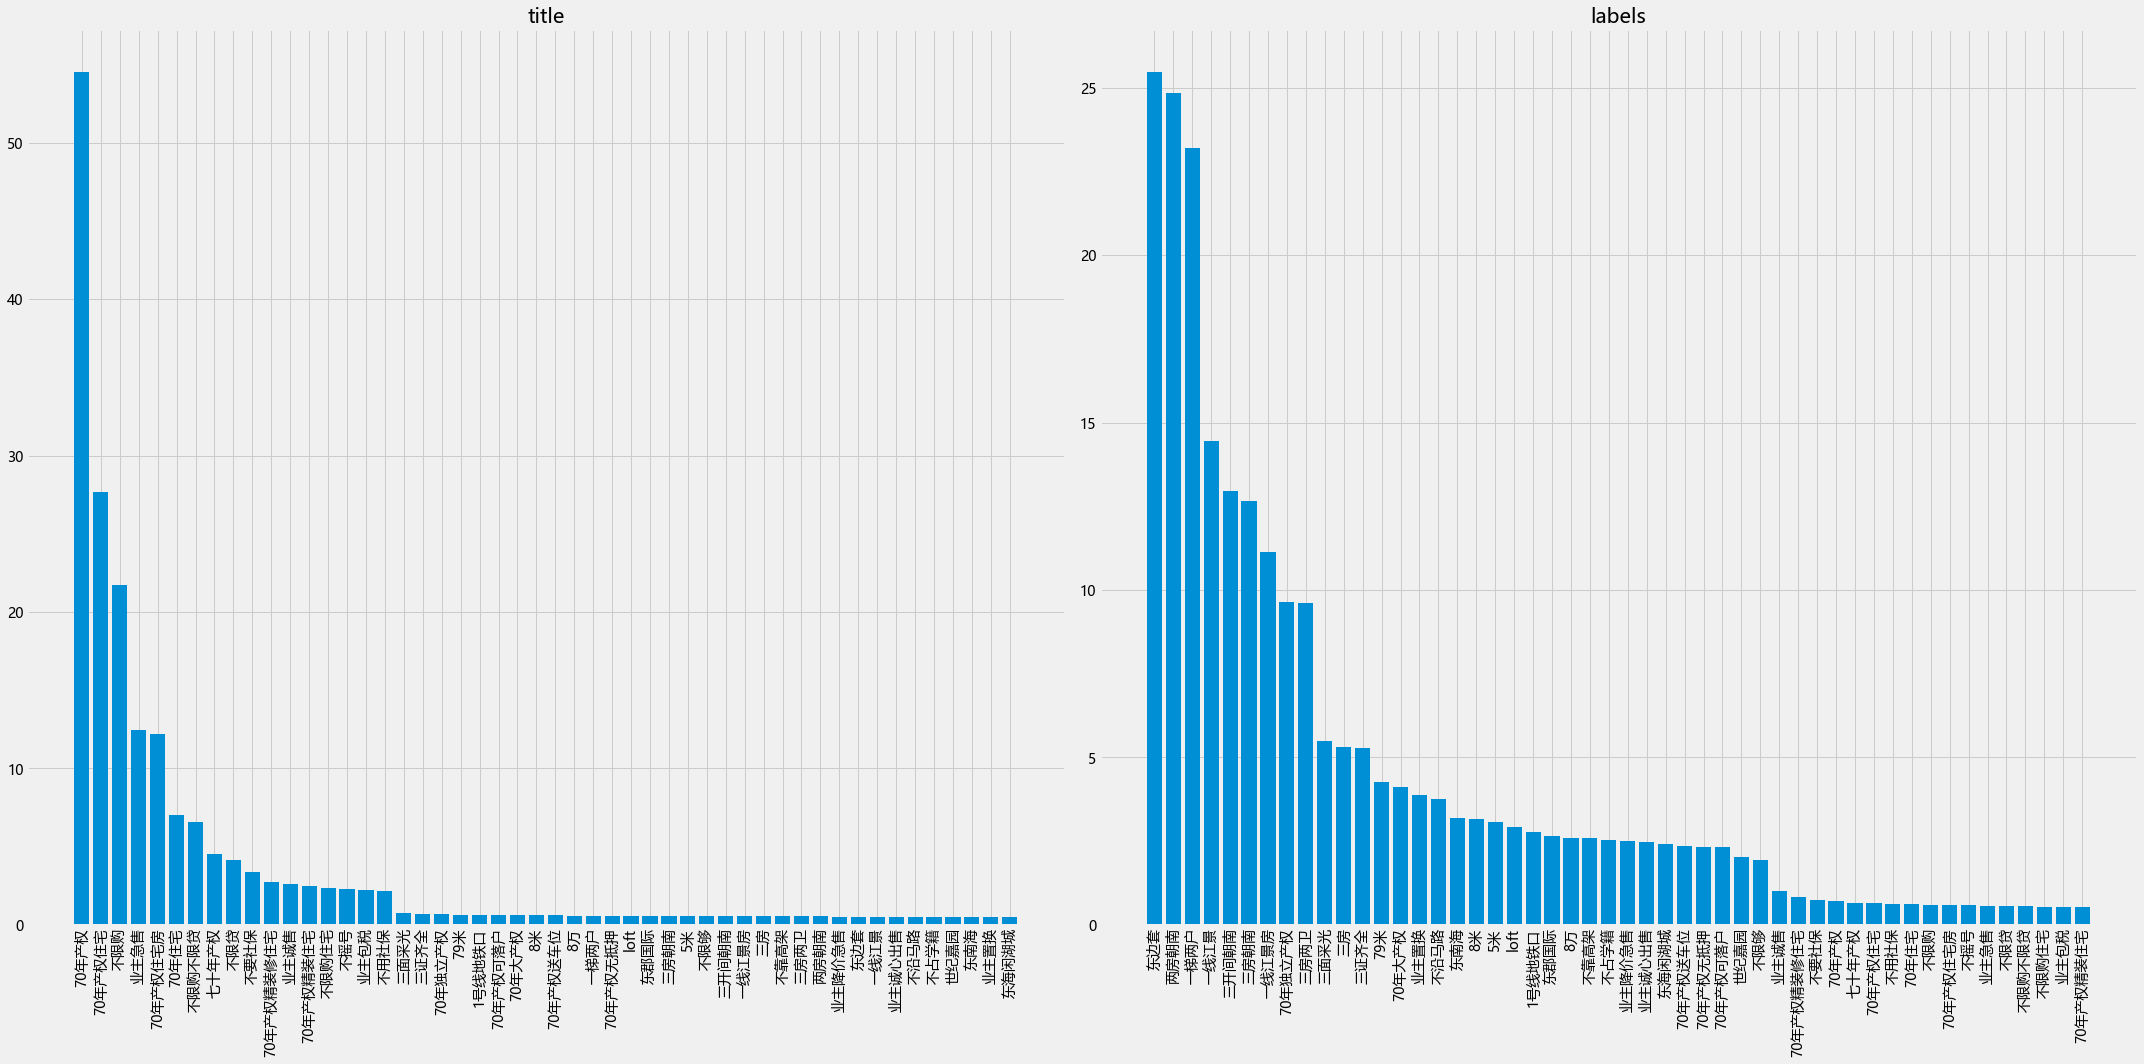

In [123]:
title_w, labels_w = topics
plt.style.use('fivethirtyeight')

def plt_words(words, ax):
    wds = sorted(words, key=lambda x: x[1], reverse=True) 
    ax.bar(range(len(words)), np.round(np.array(wds)[:,1].astype('float32'), 2))
    ax.set_xticks(range(len(words)))
    ax.set_xticklabels(list(np.array(wds)[:,0]))
    ax.tick_params(axis='x', labelrotation=90)

fig = plt.figure(figsize=(30, 15))
ax1, ax2 = fig.subplots(1, 2)
ax1.set_title('title')
ax2.set_title('labels')
plt_words(title_w, ax1)
plt_words(labels_w, ax2)

plt.tight_layout()
plt.show()

In [126]:
vector_path = r'D:\python\ML\Tencent_AILab_ChineseEmbedding.txt'
# 下载地址 https://ai.tencent.com/ailab/nlp/data/Tencent_AILab_ChineseEmbedding.tar.gz

In [129]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format(vector_path, binary=False)

In [131]:
model.word_vec('70年产权')

array([ 0.557832, -0.268617, -0.26639 ,  0.419541,  0.159764, -0.483881,
        0.122584,  0.014258, -0.191367, -0.45077 , -0.156339,  0.153065,
       -0.108535, -0.304246,  0.149692,  0.002163, -0.08953 , -0.463102,
        0.281197,  0.570823, -0.352473, -0.045357,  0.179498,  0.514107,
        0.303514,  0.642892, -0.846108,  0.712155, -0.003202,  0.406088,
        0.209283, -0.203176,  0.762083,  0.793681, -0.438855,  0.07476 ,
        0.264891,  0.690096, -0.298008,  0.332794, -0.255353,  0.60734 ,
        0.708191, -0.318004, -0.246896, -0.179591,  0.094953, -0.081343,
       -0.625971,  0.072436, -0.097451, -0.691046,  0.280712, -0.210028,
       -0.397111,  0.004024,  0.16702 ,  0.098356, -0.404581, -0.220877,
        0.45081 ,  0.58576 , -0.056051, -0.056508, -0.286713, -0.403199,
        0.191621,  0.086506,  0.413479,  0.03378 , -0.590924,  0.156633,
       -0.201933, -0.173774,  0.130053, -0.122332, -0.254989,  0.269171,
       -0.143704, -0.123847,  0.010525,  0.334774, 

In [136]:
model.similarity('70年产权', '三证齐全')

0.420385

### worldCloud

In [54]:
words = []
[words.extend(label[1:-1].split(',')) for label in origin_data['labels']]
' '.join(set(words))

" '赠露台' '主卧朝南' '送家电' '大两房'  '南北通透'  '联排别墅' '送车位'  '叠加别墅' '景观房' '新房房源'  '小户型' '小户型'  '小区中心'  '近地铁' '采光好'  '赠露台' '交通便利'  '视野好' '素质住户' '厅带阳台' '拎包入住'  '美式风' '非底楼'  '双阳台' '独栋别墅'  '素质住户'  '靠近花园' '次新小区'  '独立电梯'  '中国风'  '地暖'  '大开间'  '一梯两户' '南北通透'  '安全性高' '房型正' '小区中心' '一梯两户'  '卫浴全明'  '带车库' '两房朝南'  '配套成熟'  '新房房源'  '繁华地段' '独立电梯' '中国风'  '远离马路'  '指纹入户' '近地铁'  '环境优美'  '一梯三户' '联排别墅' '视野好'  '近学校'  '客厅朝南'  '品质小区'  '厅带阳台'  '带泳池' '下沉花园'  '三房朝南'  '带飘窗' '带车库'  '采光好'  '次新小区'  '跃层式'  '近入口' '配套成熟'  '全南户型'  '两房朝南' '指纹入户'  '交通便利'  '低密度'  '送家电'  '送车位'  '带地下室' '双阳台' '近入口' '安全性高'  '景观房'  '拎包入住' '近学校' '三房朝南' '跃层式' '环境优美'  '带花园' '非顶楼'  '房型正' '品质小区' '位置安静'  '大平层'  '主卧朝南' '地暖' '采光天井' '靠近花园'  '复式房' '繁华地段'  '欧式风'  '厨卫朝北'  '位置安静' '客厅朝南' '全南户型'  '独栋别墅' '复式房' '带飘窗'"

In [199]:
from wordcloud import WordCloud

def plt_word_cloud(words):    
    plt.figure(figsize=(20, 20))
    wd = WordCloud(
        font_path=os.path.join(os.getcwd(), 'STKAITI.TTF'),
        background_color='white',
        width=800,
        height=600,
        margin=2).generate(' '.join(words))
    plt.imshow(wd)
    plt.axis('off')

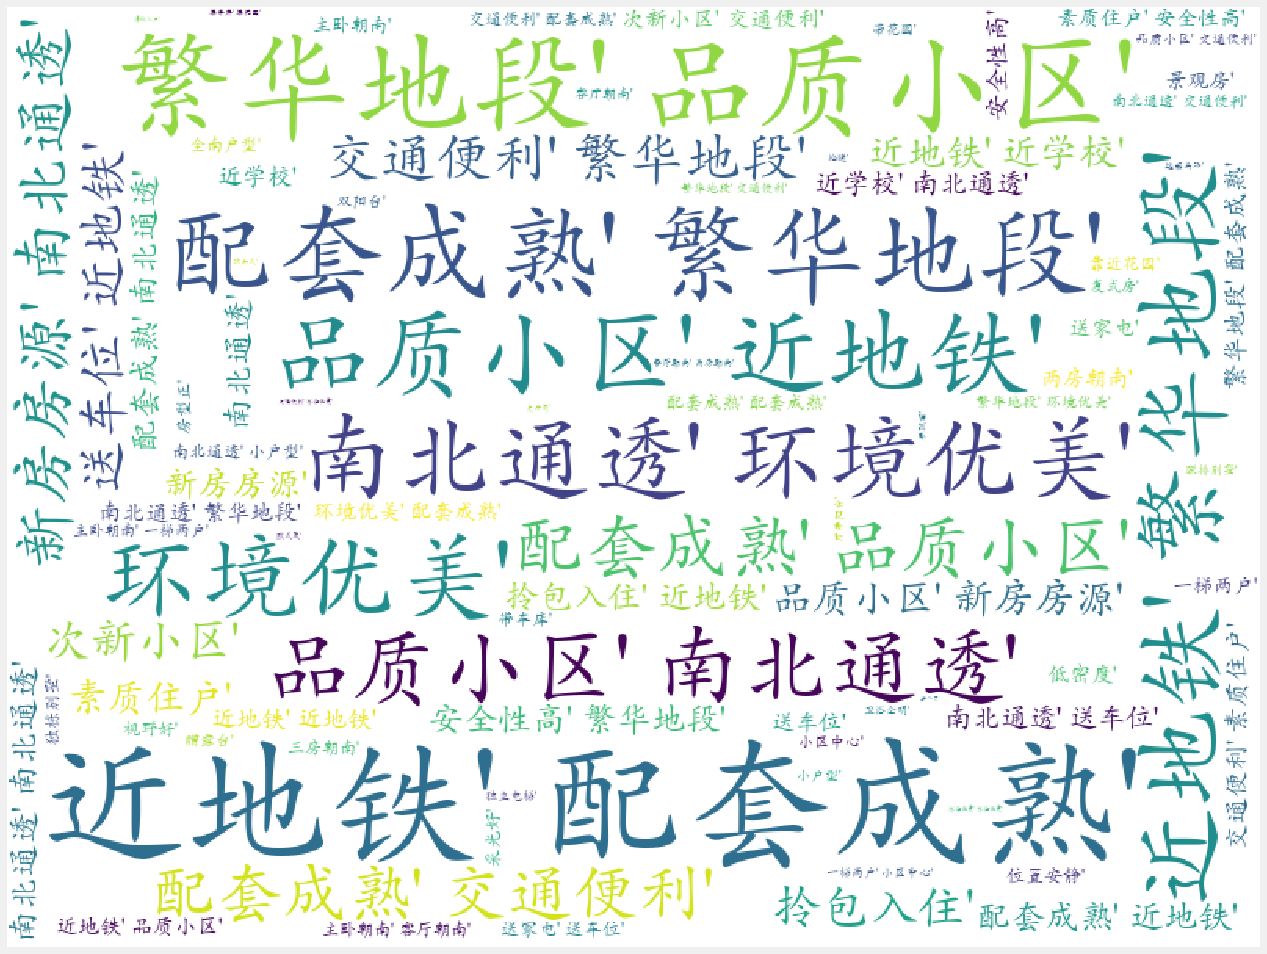

In [200]:
plt_word_cloud(words)

### 筛选停用词

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer='word', max_features=500)
features = cv.fit_transform(x_train['title'])
words_fq = pd.DataFrame(features.toarray(), columns=cv.get_feature_names()).sum(axis=0).sort_values(ascending=False)
words_fq

外地人可买           207
南北通透            139
急售              125
精装修             125
可落户上学           115
               ... 
九堡客运站地鉄口400米      2
绿城柳岸晓风            2
绿城春江花月            2
买房送车位             2
主卧朝南              2
Length: 500, dtype: int64

([<matplotlib.axis.XTick at 0x1ec8b201348>,
 <a list of 58 Text xticklabel objects>)

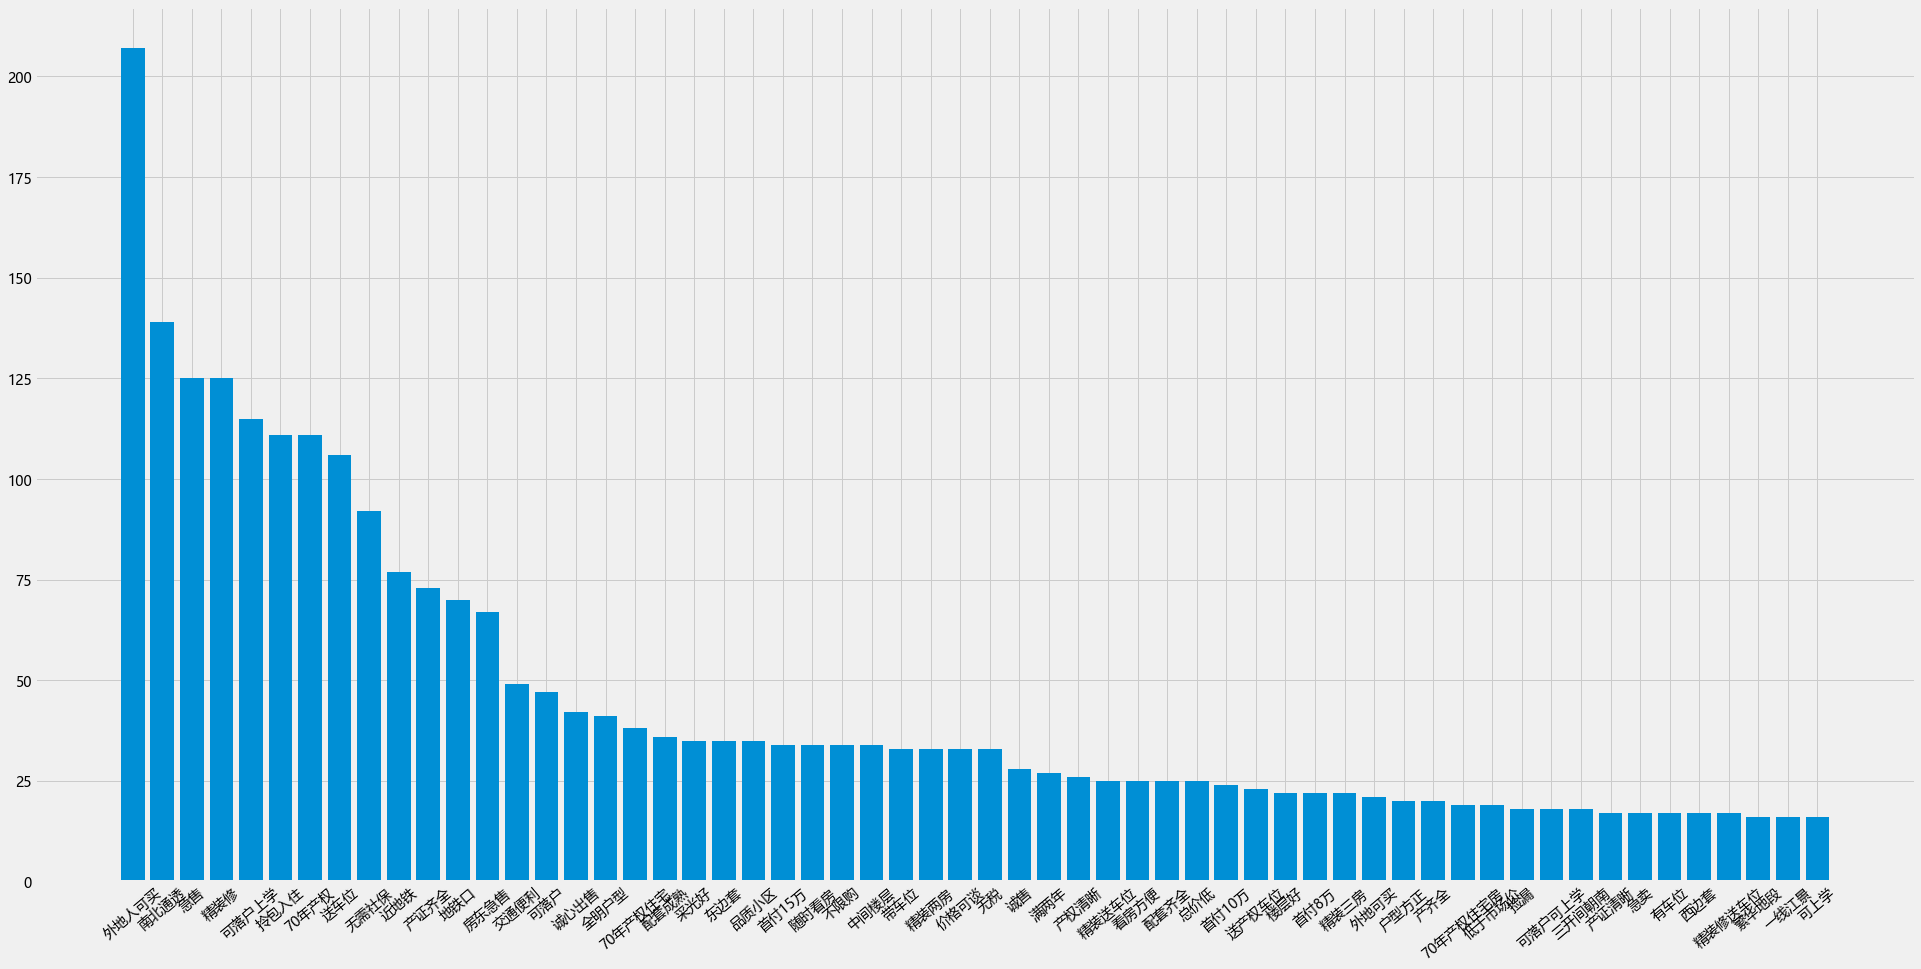

In [180]:
wods_top_fq = words_fq[words_fq>15]
plt.figure(figsize=(30, 15))
plt.bar(range(len(wods_top_fq.index)), wods_top_fq.values)
plt.xticks(range(len(wods_top_fq.index)), wods_top_fq.index, rotation=40)

In [195]:
def is_chinese(uchar):
    if uchar >= u'\u4e00' and uchar <= u'\u9fa5' and len(uchar) > 1:
        return True
    else:
        return False


def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]

In [15]:
names = cv.get_feature_names()
for n in names:
    jieba.add_word(n)

In [53]:
ts = []
for t in origin_data['title']:
    ts.extend(filter(lambda x: len(x) > 1, jieba.cut(t)))

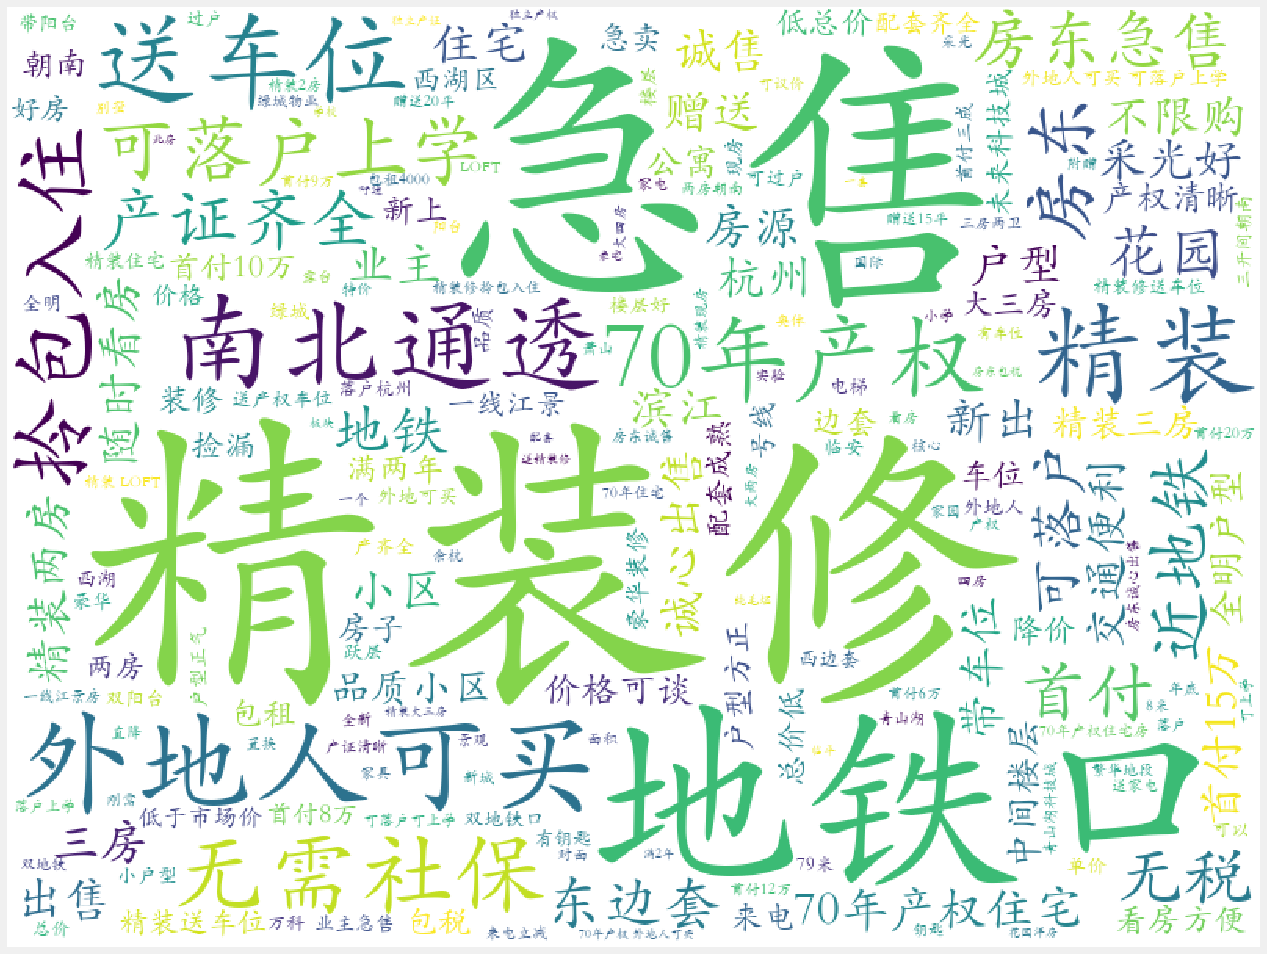

In [209]:
plt_word_cloud(ts)

In [32]:
text_path = './title_words.txt'

In [48]:
origin_data['title'].values

array(['自住装修，坐拥加州风格大湖，楼层视野佳，置换诚心出售，随时看', '复地上城 近地铁 满两年 总价醉低的两房 中间楼层 采光充足',
       '出门近江地铁口，天地學区房，电梯2房朝南东边套，视野好采光好', ..., '滨江区，中海开发商降价出售，带车位',
       '秒杀！金沙湖，精装20万，刚需两房！温馨小户型，景观房，无税', '金地天逸  开发商精装四房 小区品质高端 房东诚心出售'],
      dtype=object)

In [70]:
ets = []
for t in origin_data['title']:
    ets.append(list(filter(lambda x: len(x) > 1, jieba.cut(t))))

In [72]:
e_l_words = []
for label in origin_data['labels']:
    e_l_words.append(label[1:-1].split(','))

In [98]:
def group_t_l(title, label):
    return ' '.join([*title, *label]) 

lns = [group_t_l(t, l) for t, l in zip(ets, e_l_words)]

In [99]:
with open(text_path, 'w+', encoding='utf-8') as f:
    f.write('\n'.join(lns))

In [100]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
import multiprocessing

model = Word2Vec(LineSentence(text_path), size=400, window=5, min_count=1, workers=multiprocessing.cpu_count())
model.save('house.vector')

In [104]:
model.most_similar('花园')

C:\Users\sishi\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('精装', 0.9999871253967285),
 ('房东', 0.9999861717224121),
 ('精装修', 0.9999857544898987),
 ('户型', 0.9999854564666748),
 ('东边套', 0.9999852776527405),
 ('地铁口', 0.9999842047691345),
 ('首付', 0.9999838471412659),
 ('地铁', 0.9999830722808838),
 ('三房', 0.9999828338623047),
 ('房源', 0.9999827742576599)]